In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [28]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [120]:
sigmoid(x_test).shape

(4, 201)

In [25]:
def zeros_w(n):
    return np.zeros((n, 1))

In [64]:
def MaxMinNormalization(x):
    max = np.max(x)
    min = np.min(x)
    x = (x - min) / (max - min)
    return x

In [68]:
x = np.array((1,2,3))
x = MaxMinNormalization(x)
x

array([0. , 0.5, 1. ])

In [125]:
w = zeros_w(4)
x_test = np.array(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]).T
Y = np.array(df[['price']]).T
x_test = MaxMinNormalization(x_test)

a = np.ones((1, 201))
a.shape
x_test = np.r_[a, sigmoid(x_test)]
x_test.shape

(5, 201)

In [31]:
def predict(w, X):
    s = sigmoid(X)
    return np.dot(w.T, s)
#     return np.dot(w.T, X)

In [92]:
Y_hat = predict(w, x_test)
# print(Y_hat)

In [93]:
def JCost(Y, Y_hat):
    return np.sum(np.multiply(Y-Y_hat, Y-Y_hat))

In [78]:
def gd(Y, Y_hat, X):
    s = sigmoid(X)
    return 2*np.dot(Y-Y_hat, s.T)
#     return 2*np.dot(Y-Y_hat, X.T)

In [79]:
g = gd(Y, Y_hat, x_test)
print(g.shape)

(1, 4)


In [126]:
def model(X, Y, num_iterations = 3000, learning_rate = 0.009, print_cost = True):
    
#     w = np.random.randn(4, 1)*0.01
    m = X.shape[1]
    w = zeros_w(5)
    for i in range(num_iterations):
        Y_hat = predict(w, X)
        cost = JCost(Y, Y_hat)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        g = gd(Y, Y_hat, X).T
        w = w + learning_rate*g/m/2
        
    return w

In [129]:
w = model(x_test, Y)


Cost after iteration 0: 47691254105.000000
Cost after iteration 100: 13084554993.972206
Cost after iteration 200: 12294853903.328423
Cost after iteration 300: 12271176209.910248
Cost after iteration 400: 12268005505.125088
Cost after iteration 500: 12265835785.061256
Cost after iteration 600: 12263770070.645645
Cost after iteration 700: 12261719205.683588
Cost after iteration 800: 12259670950.399136
Cost after iteration 900: 12257623514.179611
Cost after iteration 1000: 12255576632.373735
Cost after iteration 1100: 12253530265.716793
Cost after iteration 1200: 12251484408.290386
Cost after iteration 1300: 12249439059.111025
Cost after iteration 1400: 12247394217.925577
Cost after iteration 1500: 12245349884.589033
Cost after iteration 1600: 12243306058.972404
Cost after iteration 1700: 12241262740.949106
Cost after iteration 1800: 12239219930.392939
Cost after iteration 1900: 12237177627.177776
Cost after iteration 2000: 12235135831.177538
Cost after iteration 2100: 12233094542.266174


In [ ]:
# 作业

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [108]:
print(df.shape)

(201, 29)


In [137]:
x_test = np.array(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Y = np.array(df[['price']])
print(x_test.shape)
print(Y.shape)

(201, 4)
(201, 1)


In [111]:
def MaxMinNormalization(x):
    max = np.max(x)
    min = np.min(x)
    x = (x - min) / (max - min)
    return x

In [138]:
a = np.ones((x_test.shape[0], 1))
x_test = np.c_[a, MaxMinNormalization(x_test)]
print(x_test)

[[1.         0.02345679 0.62518519 0.02814815 0.00271605]
 [1.         0.02345679 0.62518519 0.02814815 0.00271605]
 [1.         0.03407407 0.69308642 0.03358025 0.00246914]
 ...
 [1.         0.0291358  0.73975309 0.03876543 0.0017284 ]
 [1.         0.02222222 0.79037037 0.03185185 0.00271605]
 [1.         0.02419753 0.75209877 0.0308642  0.00222222]]


In [113]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [114]:
def zeros_w(n):
    return np.zeros((n, 1))

In [115]:
def rand_w(n):
    return np.random.randn(n, 1)*0.01

In [116]:
def predict(w, X):
    X = sigmoid(X)
    return np.dot(X, w)

In [117]:
def JCost(Y, Y_hat):
    return np.sum(np.multiply(Y-Y_hat, Y-Y_hat))

In [118]:
def gd(Y, Y_hat, X):
    X = sigmoid(X)
    return 2*np.dot(X.T, Y-Y_hat)

In [139]:
def model(X, Y, num_iterations = 10000, learning_rate = 0.001, print_cost = False):
    w = rand_w(5)
#     w = zeros_w(5)
    for i in range(num_iterations):
        Y_hat = predict(w, X)
        cost = JCost(Y, Y_hat)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        g = gd(Y, Y_hat, X)
        w = w + learning_rate*g
        
    return w

In [140]:
w = model(x_test, Y, print_cost = True)
# print(w)

Y_hat = predict(w, x_test)
# print(Y_hat)

Cost after iteration 0: 47691272323.241837
Cost after iteration 1000: 9172534550.763950
Cost after iteration 2000: 7261086199.526350
Cost after iteration 3000: 6058526315.715410
Cost after iteration 4000: 5301596352.322498
Cost after iteration 5000: 4824804183.631334
Cost after iteration 6000: 4524116553.154833
Cost after iteration 7000: 4334135070.622485
Cost after iteration 8000: 4213748367.415813
Cost after iteration 9000: 4137112616.351294


In [121]:
print(w)

[[-14861.51775516]
 [ -4930.52706263]
 [ 52407.86330043]
 [ -3924.38549863]
 [-11011.55493979]]


In [141]:
def RMSE(Y, Y_hat):
    m = Y.shape[0]
    return np.sqrt(JCost(Y, Y_hat) / m)

print("RMSE = " + str(RMSE(Y, Y_hat)))

RMSE = 4509.791238050594


In [142]:
def R2(Y, Y_hat):
    Y_mean = np.mean(Y)
    return 1 -(JCost(Y, Y_hat) / np.sum(np.multiply(Y-Y_mean, Y-Y_mean))) 

print("R^2 = " + str(R2(Y, Y_hat)))

R^2 = 0.6763577127840246


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


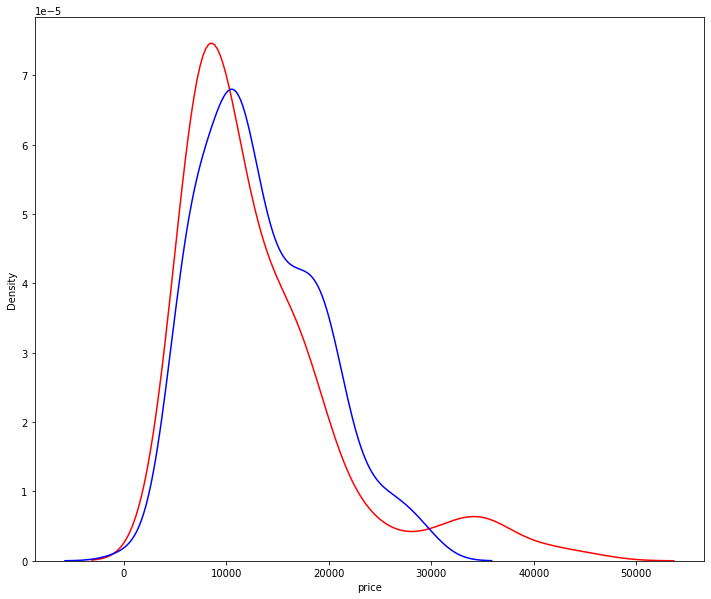

In [143]:
import seaborn as sns
%matplotlib inline

width = 12
height = 10

plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Y_hat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.show()
plt.close()

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/Users/star/Desktop/XJJ/课程/人工智能/datasets/data.csv'
df = pd.read_csv(path)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [125]:
# path of data 
print(len(df))
print(df['price'])

4600
0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [127]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [128]:
Z = df[['sqft_above', 'condition', 'sqft_living', 'sqft_lot']]
#Fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [129]:
print(lm.intercept_)
print(lm.coef_)

-172544.03106435656
[-1.69164549e+00  5.20135265e+04  2.60855107e+02 -6.73192319e-01]


In [132]:
Y_hat = lm.predict(Z)
print(Y_hat)

r2 = lm.score(Z, df['price'])
print(r2)

[ 325449.28960603 1027851.50728757  527652.92756244 ...  758856.79757907
  522410.39694125  416209.42881835]
0.19086930561225424


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


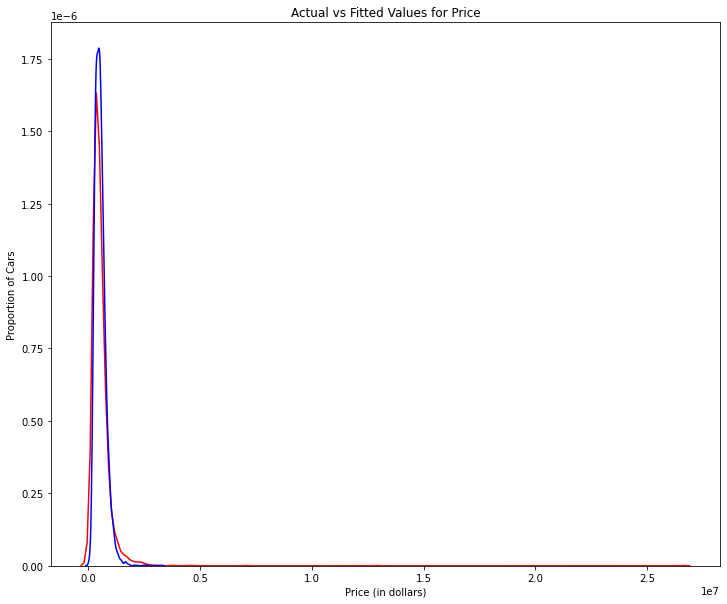

In [135]:
import seaborn as sns
%matplotlib inline
width = 12
height = 10

Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()